<a href="https://colab.research.google.com/github/Maxswasser/Class-6-data/blob/main/Assignment_6_Waser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 6 Max Wasser







# Install packages, load data, and examine and clean dataset

Install Packages

In [150]:

from plotnine import *
import plotnine
import pandas as pd
import numpy as np
from mizani.formatters import scientific_format, percent_format, currency_format
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Load data from CSV

In [151]:
df = pd.read_csv("https://raw.githubusercontent.com/envirodatascience/ENVS-617-Class-Data/main/CO_climate_change_views.csv")

Step 1: Orient and Duplicate Removal

In [152]:
df.head()

,OS,Country,City,Provider,Gender,DOB,facebook_use,voter_reg,works_in_oil_gas,climate_change_importance,climate_change_worry,climate_change_personal_harm,climate_change_future_gen_harm,county
0,Android,US,Frisco,Unknown,female,1966,Every day,Not registered to vote,No,Very important,Somewhat worried,Only a little,A great deal,Summit County
1,iOS,US,Denver,Unknown,male,1961,Every day,"Registered to vote, registered as Democratic",No,Very important,Somewhat worried,A moderate amount,A great deal,Boulder County
2,iOS,US,Denver,Unknown,female,1986,Every day,Not registered to vote,No,Very important,Somewhat worried,A moderate amount,A great deal,Douglas County
3,Android,US,Denver,T-Mobile,male,1991,Every day,Not registered to vote,"Yes, a close friend or family member is employ...",Very important,Not very worried,A moderate amount,A moderate amount,Adams County
4,Android,US,Denver,Unknown,female,1985,Every day,"Registered to vote, registered as Independent,...",No,Very important,Very worried,A moderate amount,A great deal,Denver County


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   OS                              750 non-null    object
 1   Country                         750 non-null    object
 2   City                            750 non-null    object
 3   Provider                        750 non-null    object
 4   Gender                          750 non-null    object
 5   DOB                             750 non-null    int64 
 6   facebook_use                    750 non-null    object
 7   voter_reg                       750 non-null    object
 8   works_in_oil_gas                750 non-null    object
 9   climate_change_importance       750 non-null    object
 10  climate_change_worry            750 non-null    object
 11  climate_change_personal_harm    750 non-null    object
 12  climate_change_future_gen_harm  750 non-null    ob

Looks like there are at least two missing counties. Let's drop duplicates, and Nulls

In [154]:
#value_counts is an useful piece of code! neat
df.climate_change_future_gen_harm.value_counts()

A great deal         457
A moderate amount    161
Only a little         50
Not at all            43
Don’t know            39
Name: climate_change_future_gen_harm, dtype: int64

In [155]:
df[df.duplicated(keep=False) == True]
#not too many duplicates, let's drop them

,OS,Country,City,Provider,Gender,DOB,facebook_use,voter_reg,works_in_oil_gas,climate_change_importance,climate_change_worry,climate_change_personal_harm,climate_change_future_gen_harm,county
14,Web,US,Colorado Springs,Unknown,female,1958,I never use Facebook or Instagram,"Registered to vote, registered as Independent,...",No,Very important,Very worried,A great deal,A great deal,El Paso County
89,Web,US,Colorado Springs,Unknown,female,1958,I never use Facebook or Instagram,"Registered to vote, registered as Independent,...",No,Very important,Very worried,A great deal,A great deal,El Paso County
111,Android,US,Denver,AT&T,female,1974,Every day,"Registered to vote, registered as Independent,...",No,Somewhat important,Somewhat worried,A moderate amount,A moderate amount,Jefferson County
186,Web,US,Denver,Unknown,male,1995,Once a week,"Registered to vote, registered as Democratic","Yes, I am employed in the oil and gas industry",Extremely important,Very worried,A great deal,A great deal,Denver County
215,Android,US,Pueblo,Unknown,female,1980,Every day,Not registered to vote,No,Somewhat important,Somewhat worried,A moderate amount,A great deal,Pueblo County
216,Android,US,Pueblo,Unknown,female,1980,Every day,Not registered to vote,No,Somewhat important,Somewhat worried,A moderate amount,A great deal,Pueblo County
290,Web,US,Denver,Unknown,male,1995,Once a week,"Registered to vote, registered as Democratic","Yes, I am employed in the oil and gas industry",Extremely important,Very worried,A great deal,A great deal,Denver County
330,Android,US,Denver,AT&T,female,1974,Every day,"Registered to vote, registered as Independent,...",No,Somewhat important,Somewhat worried,A moderate amount,A moderate amount,Jefferson County
575,Android,US,Denver,AT&T,female,1974,Every day,"Registered to vote, registered as Independent,...",No,Somewhat important,Somewhat worried,A moderate amount,A moderate amount,Jefferson County


In [156]:
df = df[df.duplicated() == False]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 745 entries, 0 to 749
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   OS                              745 non-null    object
 1   Country                         745 non-null    object
 2   City                            745 non-null    object
 3   Provider                        745 non-null    object
 4   Gender                          745 non-null    object
 5   DOB                             745 non-null    int64 
 6   facebook_use                    745 non-null    object
 7   voter_reg                       745 non-null    object
 8   works_in_oil_gas                745 non-null    object
 9   climate_change_importance       745 non-null    object
 10  climate_change_worry            745 non-null    object
 11  climate_change_personal_harm    745 non-null    object
 12  climate_change_future_gen_harm  745 non-null    ob

And now to deal with our Null County Objects

In [157]:
df.dropna(inplace=True)
df.info()
#done, we now have 743 rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 743 entries, 0 to 749
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   OS                              743 non-null    object
 1   Country                         743 non-null    object
 2   City                            743 non-null    object
 3   Provider                        743 non-null    object
 4   Gender                          743 non-null    object
 5   DOB                             743 non-null    int64 
 6   facebook_use                    743 non-null    object
 7   voter_reg                       743 non-null    object
 8   works_in_oil_gas                743 non-null    object
 9   climate_change_importance       743 non-null    object
 10  climate_change_worry            743 non-null    object
 11  climate_change_personal_harm    743 non-null    object
 12  climate_change_future_gen_harm  743 non-null    ob

# Make dependent variable binary 
Creaty binary column for climate change personal harm - that seems like the metric that will best describe how people will act

In [158]:
#first, a closer look
df.climate_change_personal_harm.value_counts()

A moderate amount    280
A great deal         202
Only a little        146
Not at all            74
Don’t know            41
Name: climate_change_personal_harm, dtype: int64

In [159]:
#this is a very different response than harm to future generations, but I'm sure they are still correlated
df.climate_change_future_gen_harm.value_counts()

A great deal         453
A moderate amount    159
Only a little         49
Not at all            43
Don’t know            39
Name: climate_change_future_gen_harm, dtype: int64

In [160]:
#breaking it up into two categories - moderate to severe personal harm, and only a little/don't know/no personal harm
df['personal_harm'] = np.where(df['climate_change_personal_harm'] == 'A great deal', 1, \
np.where(df['climate_change_personal_harm'] == 'A moderate amount', 1,0))




df[['climate_change_personal_harm','personal_harm']].tail()



,climate_change_personal_harm,personal_harm
745,A great deal,1
746,Only a little,0
747,A great deal,1
748,Only a little,0
749,Don’t know,0


In [161]:
#double check
df.groupby('climate_change_personal_harm').agg(worry_check = ('personal_harm','mean'))
#excellent

,worry_check
climate_change_personal_harm,
A great deal,1
A moderate amount,1
Don’t know,0
Not at all,0
Only a little,0


Beliefs that might be correlated with views on climate change personal harm: oi and gas industry affiliation, voter registration type, age class, gender, county, city, facebook use

In [162]:
#binarize (that's not a word, but i like it) the other correlated variables - let's start with voter registration.
df.voter_reg.value_counts()

Registered to vote, registered as Democratic                                             244
Registered to vote, registered as Independent, third party, unknown, or unaffiliated     216
Not registered to vote                                                                   134
Registered to vote, registered as Republican                                             118
I don’t know                                                                              31
Name: voter_reg, dtype: int64

In [163]:
#i predict that democrats will be more likely to have stronger views on climate change than independents, republicans, and non-voters. Climate has been shown to be an important issue for democratic voters. 
#- I'm assigning democrats "1", everyone else "0". We could also do a score, but this seems easier.
df['dem_yes'] = np.where(df['voter_reg'] == 'Registered to vote, registered as Democratic', 1, 0)

#and a little check
df.groupby('voter_reg').agg(worry_check = ('dem_yes','mean'))


,worry_check
voter_reg,
I don’t know,0
Not registered to vote,0
"Registered to vote, registered as Democratic",1
"Registered to vote, registered as Independent, third party, unknown, or unaffiliated",0
"Registered to vote, registered as Republican",0


In [164]:
df.works_in_oil_gas.value_counts()

No                                                                                               542
Yes, a close friend or family member is employed in the oil and gas industry                     100
Not sure                                                                                          40
Yes, I am employed in the oil and gas industry                                                    37
Yes, both myself and close friends or family members are employed in the oil and gas industry     24
Name: works_in_oil_gas, dtype: int64

In [165]:


#i predict that having an oil and gas affiliation makes you less sympathetic to climate change. Oil and gas = 1, no affiliation = 0.
#we'll be looking for a negative correlation between oil and gas affiliation and climate sympathy. If you or a loved one works in Oil and Gas, perhaps you will perceive the acknowledgement of climate change as threatening to your livelihood.
df['oil_gas_yes'] = np.where(df['works_in_oil_gas'] == 'Yes, I am employed in the oil and gas industry', 1, \
       np.where(df["works_in_oil_gas"] == "Yes, a close friend or family member is employed in the oil and gas industry", 1, \
        np.where(df["works_in_oil_gas"] == "Yes, both myself and close friends or family members are employed in the oil and gas industry", 1, 0)))

#and a little check
df.groupby('works_in_oil_gas').agg(worry_check = ('oil_gas_yes','mean'))


,worry_check
works_in_oil_gas,
No,0
Not sure,0
"Yes, I am employed in the oil and gas industry",1
"Yes, a close friend or family member is employed in the oil and gas industry",1
"Yes, both myself and close friends or family members are employed in the oil and gas industry",1


In [166]:
#next I predict that age is correlated with climate sympathy
#older folks tend to be less climate worried than younger folks - especially if we're examining the metric of how climate change is likely to impact them.
#age is put in as the integer DOB, so larger numbers = lower age. Let's make a new column: "age"
df["age"] = (2021 - df["DOB"])
df["age"]

0      55
1      60
2      35
3      30
4      36
       ..
745    40
746    42
747    22
748    20
749    35
Name: age, Length: 743, dtype: int64

In [167]:
df.age.describe()

count    743.000000
mean      41.142665
std       13.922430
min       18.000000
25%       31.000000
50%       39.000000
75%       50.000000
max       88.000000
Name: age, dtype: float64

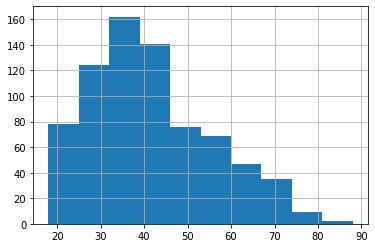

In [168]:
df.age.hist()

In [169]:
#age buckets - better for graphing I suppose
df["age_buckets"] = pd.cut(df.age, 
   bins=[18, 25, 35, 45, 55, 65, 75, 85, 95],
   labels=["18-25", "26-35", "36-45", "46-55", "56-65", "66-75", "76-85’", "86-95"]
  )


Plotting age buckets vs. percent neutral.

In [170]:
#this is really percent *not neutral*
df_percent_neutral = df.groupby('age_buckets', as_index=False).agg(personal_harm = ('personal_harm','mean'))

In [171]:
df_percent_neutral.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age_buckets    8 non-null      category
 1   personal_harm  8 non-null      float64 
dtypes: category(1), float64(1)
memory usage: 520.0 bytes


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


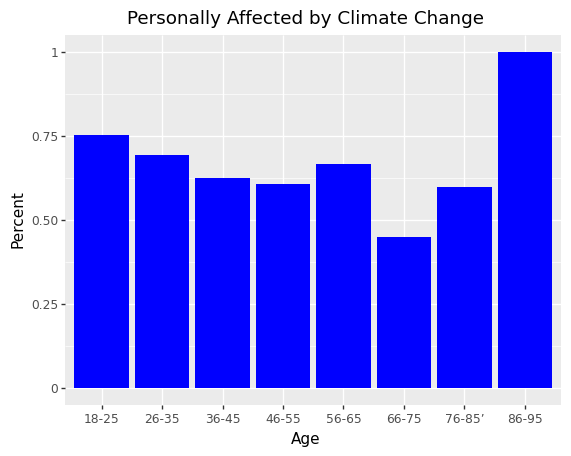

<ggplot: (8753812215025)>

In [172]:
(
    
  ggplot()
  + geom_col(df_percent_neutral, aes(x="age_buckets", y = "personal_harm"), fill = "blue")
  + xlab("Age")
  + ylab("Percent")
  + ggtitle("Personally Affected by Climate Change")
)
  


In [173]:
df.groupby('personal_harm').agg(dem_yes = ('dem_yes','mean'), avg_age=('age','mean'), oil_yes =("oil_gas_yes", 'mean'))

,dem_yes,avg_age,oil_yes
personal_harm,,,
0,0.199234,43.252874,0.199234
1,0.398340,40.000000,0.226141


Looks like DEMs are slightly younger, and more worried. Interestingly, it seems that oil and gas affiliations are associated with a higher perceived chance of personal harm - maybe that can be explained by employment concerns - you are likely to be impacted if we stop consuming oil/gas. Let's examine some statitics to see if that is likely to be explained by chance.

*   List item
*   List item



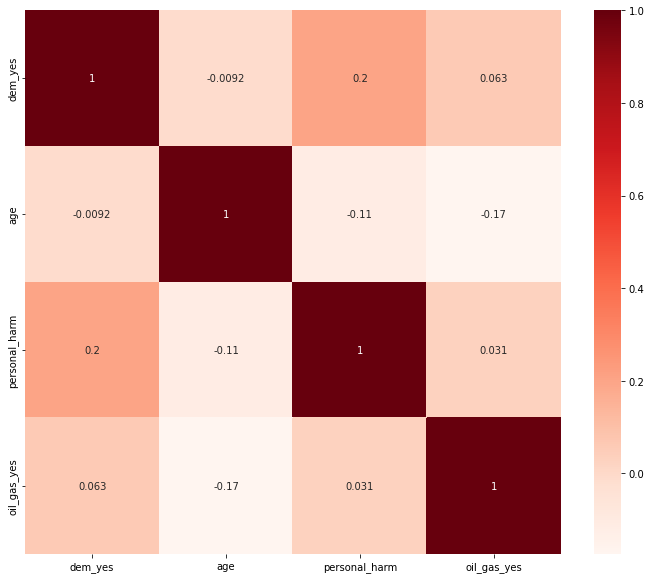

In [174]:
#Correlation heatmap 
df_to_correlate = df[['dem_yes', 'age', 'personal_harm','oil_gas_yes']]

plt.figure(figsize=(12,10))
cor = df_to_correlate.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


A slightly positive correlation with worry about personal harm and being a registered democrat. Very slight positive correlation between registered dem and oil/gas affiliation - surprising. Very slight positive correlation between oil/gas affiliation and personal harm. Registered democrats, and oil/gas affiliated folks appear to be slightly younger.

# Single Variable Statistical Tests



In [191]:
#t-test

stats.ttest_ind(df["personal_harm"][df["dem_yes"] == 1], df["personal_harm"][df["dem_yes"] == 0])


Ttest_indResult(statistic=5.625679873729894, pvalue=2.620156578101828e-08)

T-test results: p-value is 2.6*10-8 - so statistically signficant

# Time to build a model
Most correlated variable to least correlated variable with signs: dem_yes (+), age(-), oil_gas(+)

In [194]:
y = df['personal_harm']
x = sm.add_constant(df[['dem_yes','age', "oil_gas_yes"]])

result=sm.Logit(y,x).fit()
print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.620561
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.043     
Dependent Variable: personal_harm    AIC:              930.1532  
Date:               2021-10-24 16:50 BIC:              948.5960  
No. Observations:   743              Log-Likelihood:   -461.08   
Df Model:           3                LL-Null:          -481.64   
Df Residuals:       739              LLR p-value:      6.1570e-09
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
const          1.0318    0.2632   3.9208  0.0001   0.5160   1.5477
dem_yes        0.9851    0.1821   5.4097  0.0000   0.6282   1.

Model fit is pretty weak (Pseudo R-squared: 0.043). Oil/Gas industry affiliation surprisingly did not have any explanatory power in this model; however, age and democratic voter registration were statistically significant predictors of perceived climate change harm to self. Age has a fairly weak and negative effect on perceived climate change harm to self (coefficient = -0.0170), while democratic voter registration had the strongest coefficient at .9851.     

Because I'm surprised by the weak correlation between oil/gas affiliation and perceived harm to self from climate change, it might be worth looking at. My guess is that it is canceled by two opposing effects that are not testable with this dataset: those who feel that climate-change will reduce job security, thus increasing perceived personal harm. Second, that oil/gas affiliation may be associated with denial of the risks of climate change; if climate change isn't real, how could it harm me?


In [207]:
#Let's look at future gen harm

df['future_harm'] = np.where(df['climate_change_future_gen_harm'] == 'A great deal', 1, \
np.where(df['climate_change_future_gen_harm'] == 'A moderate amount', 1,0))


#and a little check
df.groupby('climate_change_future_gen_harm').agg(worry_check = ('future_harm','mean'))
#looks good


,worry_check
climate_change_future_gen_harm,
A great deal,1
A moderate amount,1
Don’t know,0
Not at all,0
Only a little,0


In [208]:
#one way ttest
stats.ttest_ind(df["future_harm"][df["oil_gas_yes"] == 1], df["future_harm"][df["oil_gas_yes"] == 0])


Ttest_indResult(statistic=1.492489622730618, pvalue=0.13599645646671538)

Still no statistical significant correlation between oil/gas affiliation and perceived future harm. It could perhaps change if I were to restrict oil/gas affiliation to only those actually employed in the industry. But I'm not on a fishing trip, so we'll let it rest. 